# 0.0. Imports:

In [1]:
import pandas as pd

import inflection 

import math

import nbextensions

import datetime

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML 
from IPython.display import Image

# 0.1. Loading data:

In [2]:
df_sales_raw = pd.read_csv( 'train.csv', low_memory=False )

df_store_raw = pd.read_csv( 'store.csv', low_memory=False )

#merge

df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store')

In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
470365,621,2,2014-05-06,7168,930,1,1,0,0,a,a,30.0,7.0,2002.0,0,NaN,NaN,NaN


# 1.0. Data description:

In [4]:
df1 = df_raw.copy()

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.1 Rename Columns:

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

# 1.2. Data Dimensions:

In [9]:
print ( 'Number of Rows: {}'.format( df1.shape[0] ) )
print ( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


# 1.3. Data Types:

In [10]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [11]:
df1['date'] = pd.to_datetime(df1['date'])

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 1.4. Check 'NAs':

In [13]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# 1.5. Fillout 'NA':

In [14]:
# competition_distance              2642
# competition_open_since_month    323348
# competition_open_since_year     323348
# promo2                               0
# promo2_since_week               508031
# promo2_since_year               508031
# promo_interval                  508031                

In [15]:
# competition_distance:

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

In [16]:
# competition_open_since_month:

df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

In [17]:
# competition_open_since_year:

df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 ) 

In [18]:
# promo2_since_week:

df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

In [19]:
# promo2_since_year:

df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

In [20]:
# promo_interval:

month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1 )

In [21]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [22]:
df1.sample(5).T

,856561,21941,763655,597540,88154
store,1027,757,666,686,70
day_of_week,6,7,5,7,3
date,2013-05-25 00:00:00,2015-07-12 00:00:00,2013-08-16 00:00:00,2014-01-12 00:00:00,2015-05-13 00:00:00
sales,10240,0,6802,0,6856
customers,1406,0,629,0,759
open,1,0,1,0,1
promo,0,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,1,0,0
store_type,a,a,c,a,c


# 1.6. Change Types:

In [23]:
df1 = df1.copy()

In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [25]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')

In [26]:
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( 'int64' ) 

In [27]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype( 'int64' ) 

In [28]:
df1['promo2_since_year'] = df1['promo2_since_year'].astype( 'int64' )  

In [29]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7. Descriptive Statistical:

In [30]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )

cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'] )

In [31]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
239860,812,7,0,0,0,0,0,2590.0,9,2012,0,52,2014,0
988456,237,6,4225,443,1,0,0,1420.0,11,2007,0,4,2013,0


In [32]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
664656,0,a,a,"Jan,Apr,Jul,Oct",Nov
23901,0,d,c,"Jan,Apr,Jul,Oct",Jul


# 1.7.1 Numerical Attributes:

In [38]:
import numpy as np

In [39]:
# Central Tendency - mean, median:

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame( num_attributes.apply(  np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply(  min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns =  [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ] 

In [40]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


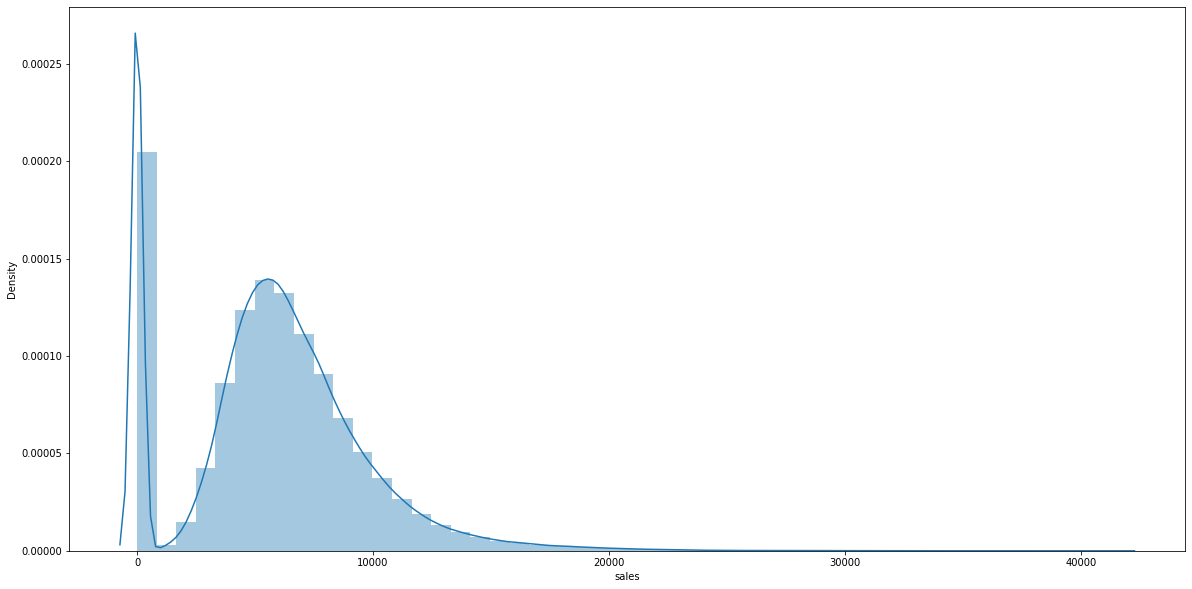

In [41]:
sns.distplot( df1['sales'] )
plt.rcParams['figure.figsize'] = (20, 10)

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

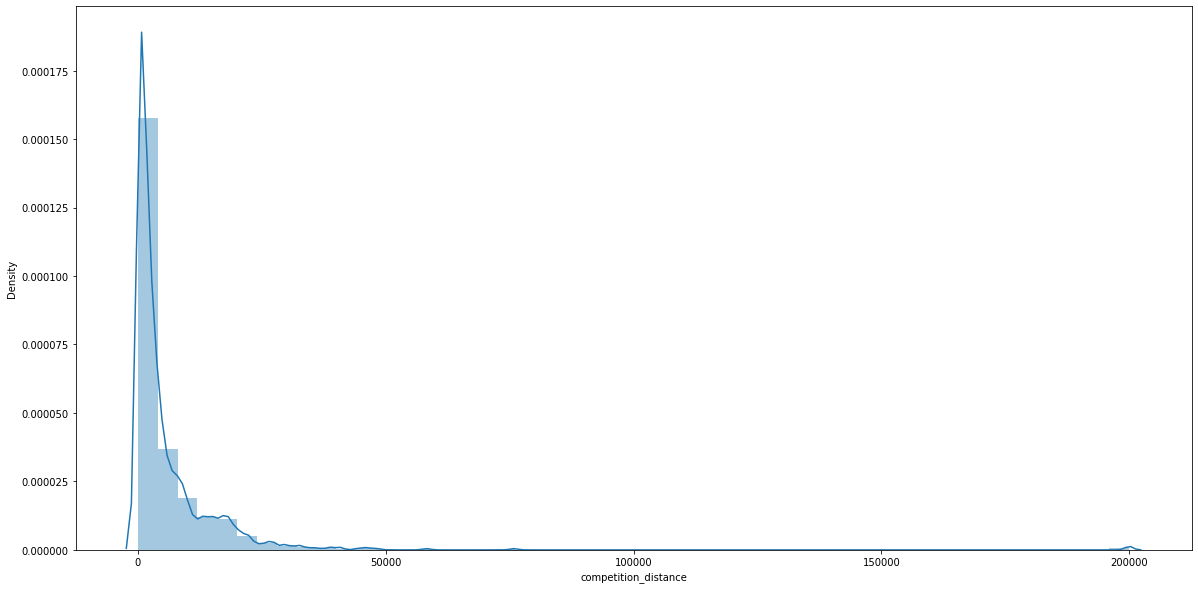

In [37]:
sns.distplot( df1['competition_distance'] )
plt.rcParams['figure.size']=(20,10)

# 1.7.2 Categorical Attributes:

In [42]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

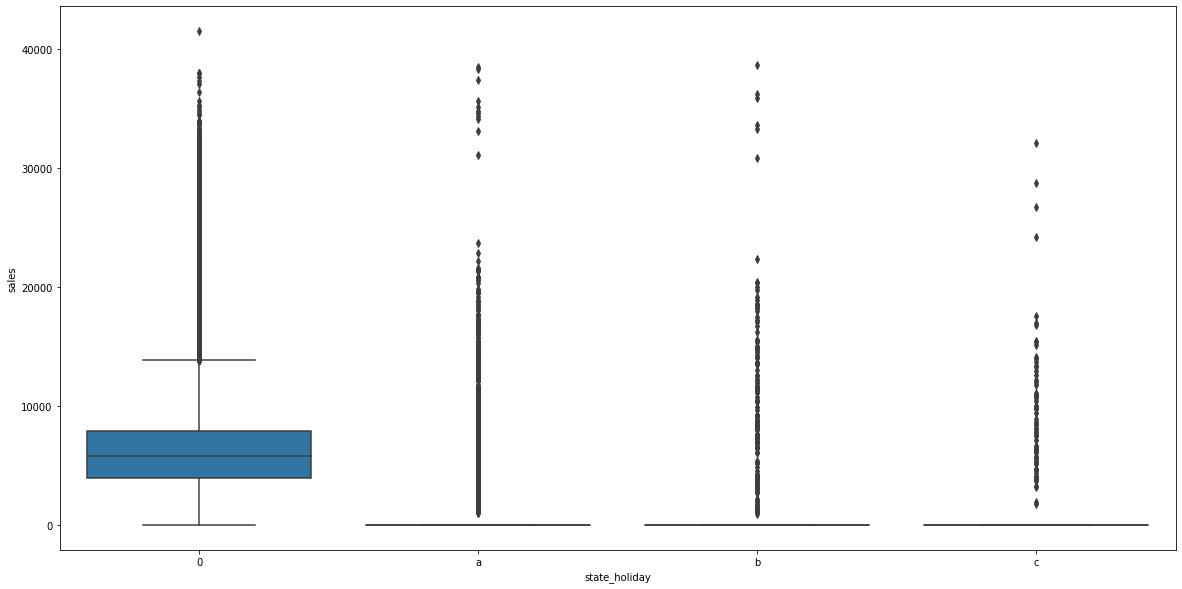

In [43]:
# state_holiday => 4

sns.boxplot( x ='state_holiday' , y ='sales', data = df1)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

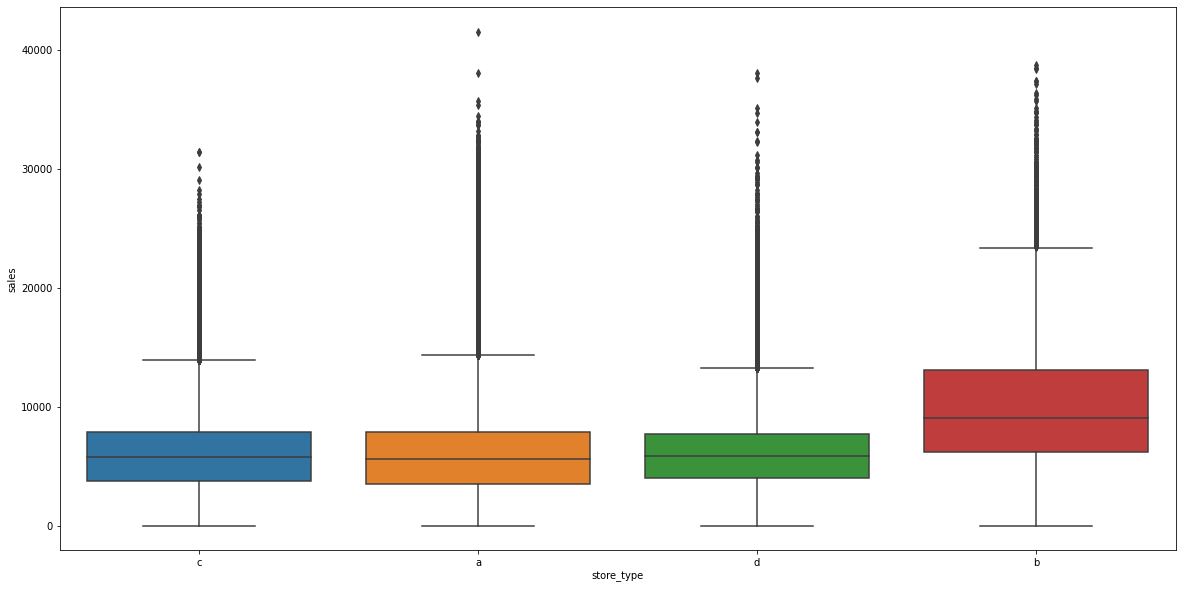

In [44]:
# store_type => 4

sns.boxplot( x='store_type', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

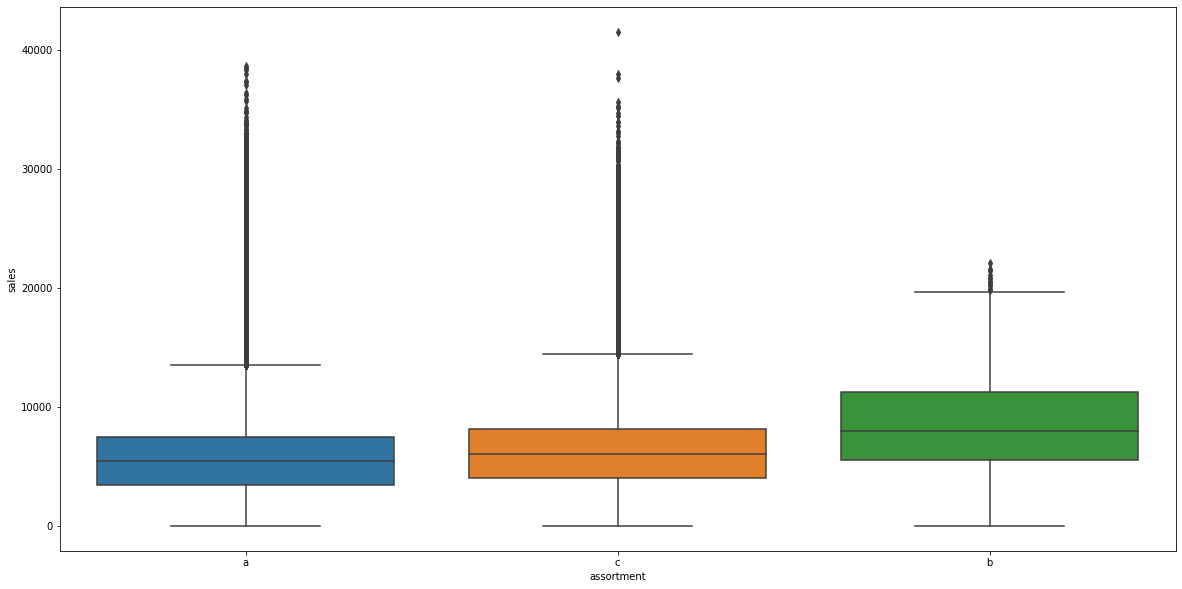

In [45]:
# assortment => 3

sns.boxplot( x='assortment', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

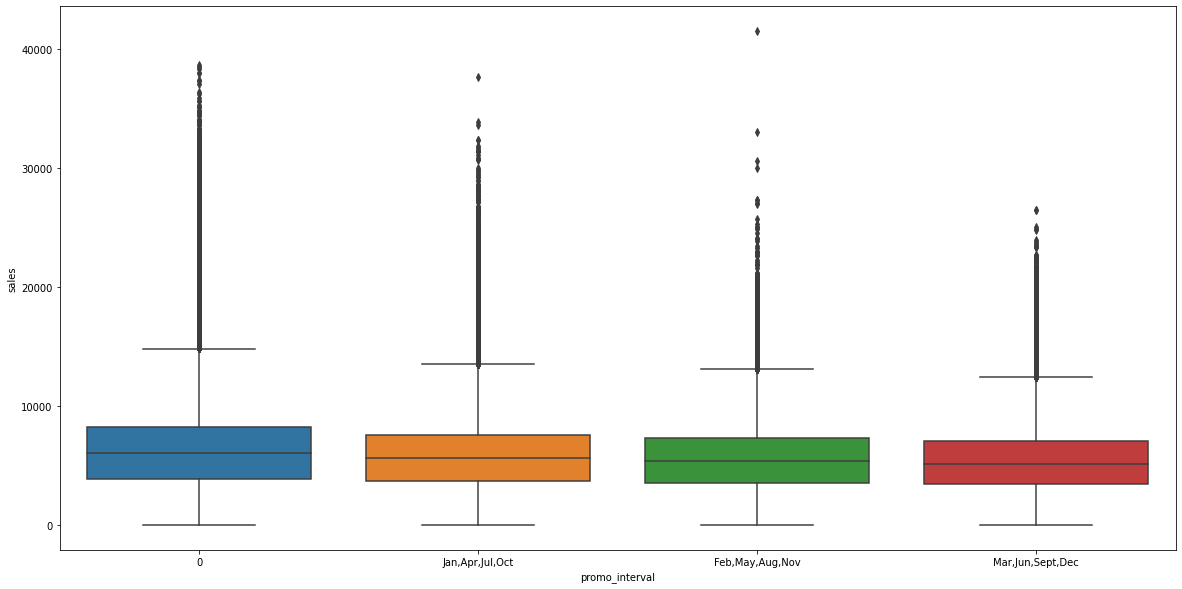

In [46]:
# promo_interval => 4

sns.boxplot(x='promo_interval', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

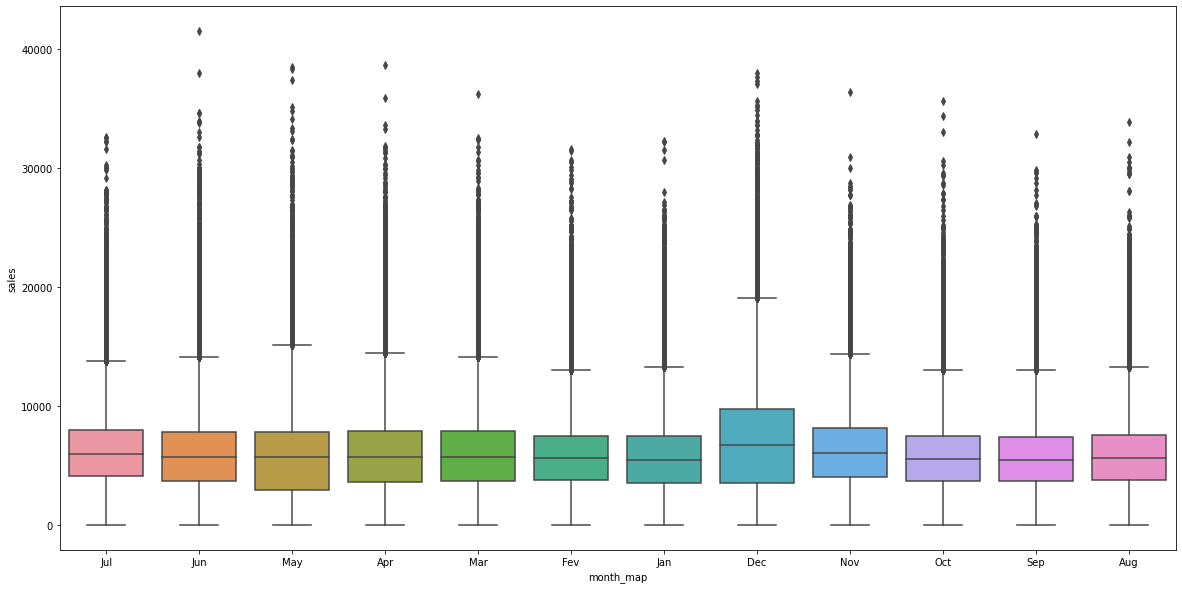

In [47]:
# month_map =>  12

sns.boxplot(x='month_map', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

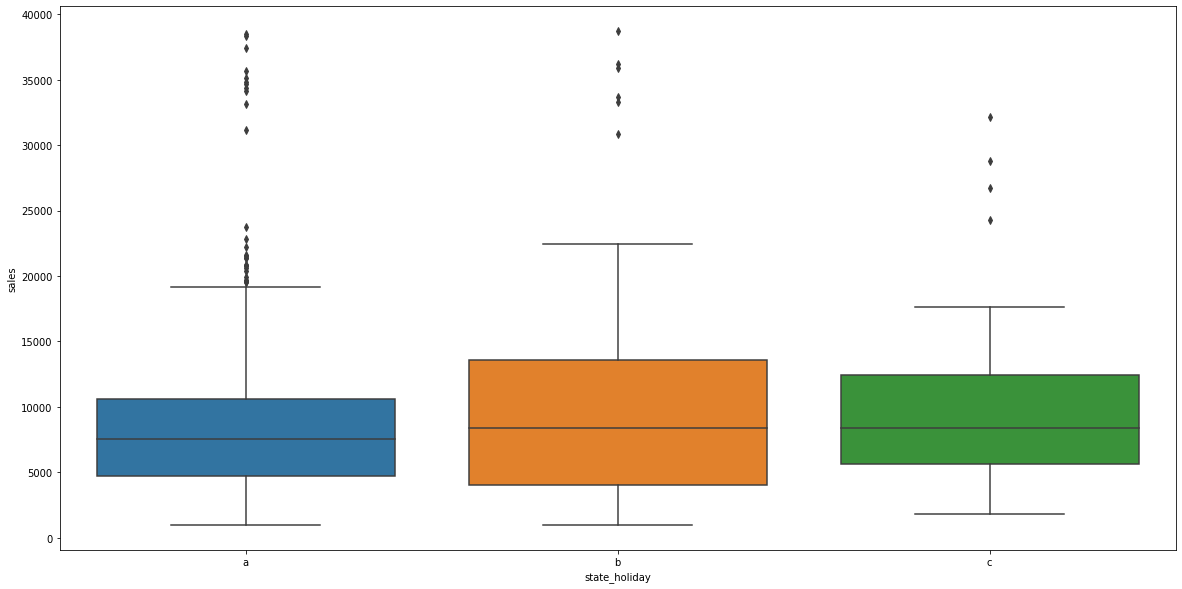

In [48]:
aux1 = df1[( df1['state_holiday' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'state_holiday', y = 'sales', data = aux1 )
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

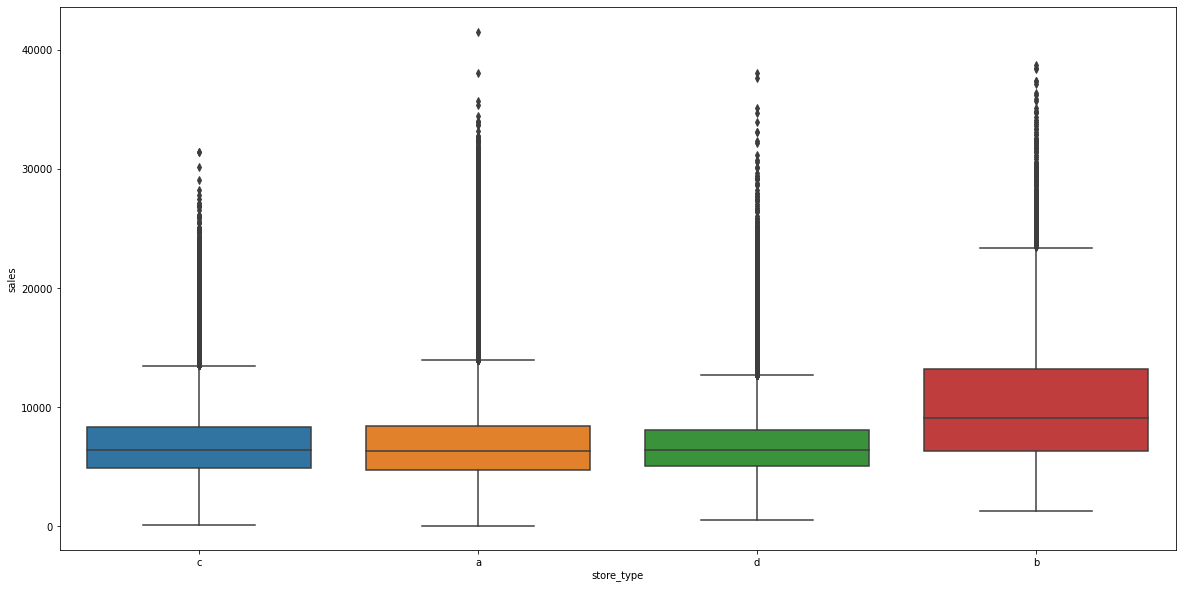

In [49]:
aux1 = df1[( df1[ 'store_type' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'store_type', y = 'sales', data = aux1 )
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

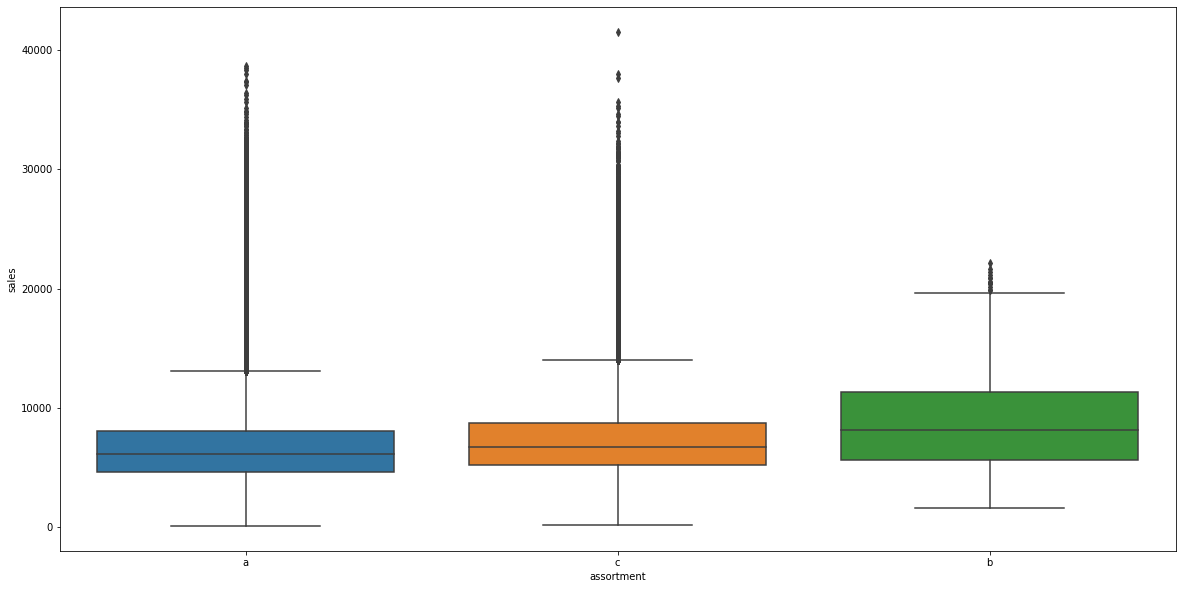

In [50]:
aux1 = df1[( df1[ 'assortment' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'assortment', y = 'sales', data = aux1 )
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

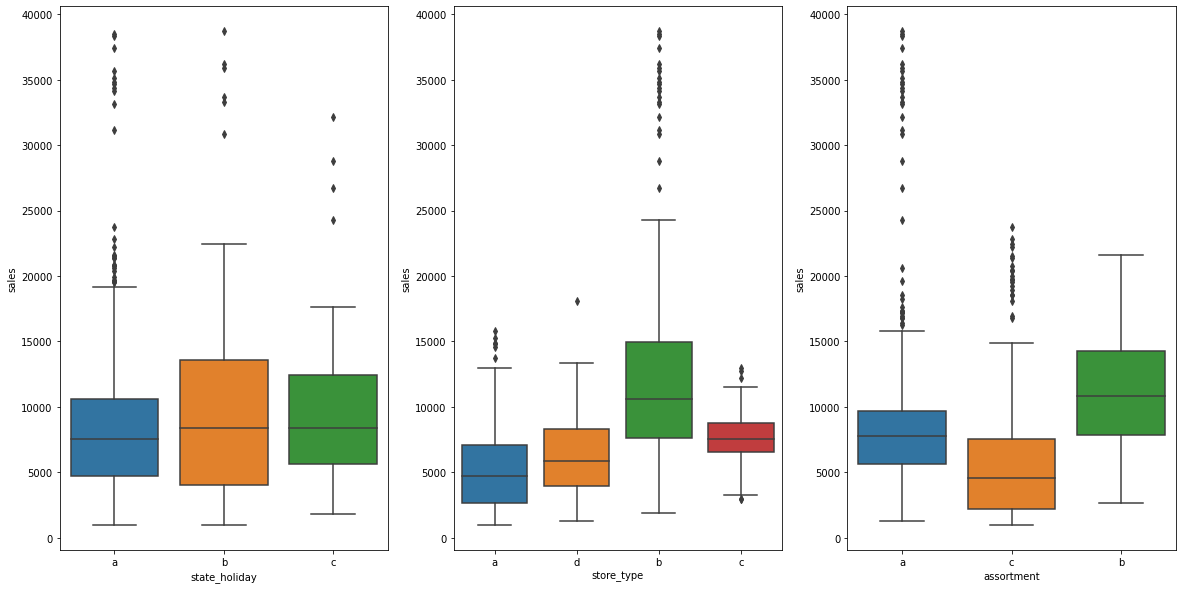

In [51]:
aux1 = df1[ ( df1['state_holiday'] !='0' ) & ( df1['sales'] > 0 ) ]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux1 )
plt.rcParams["figure.size"]=(20,10)

# 2.0 FEATURE ENGINEERING:

In [52]:
df2 = df1.copy()

# 2.1 Mapa mental de hipóteses:

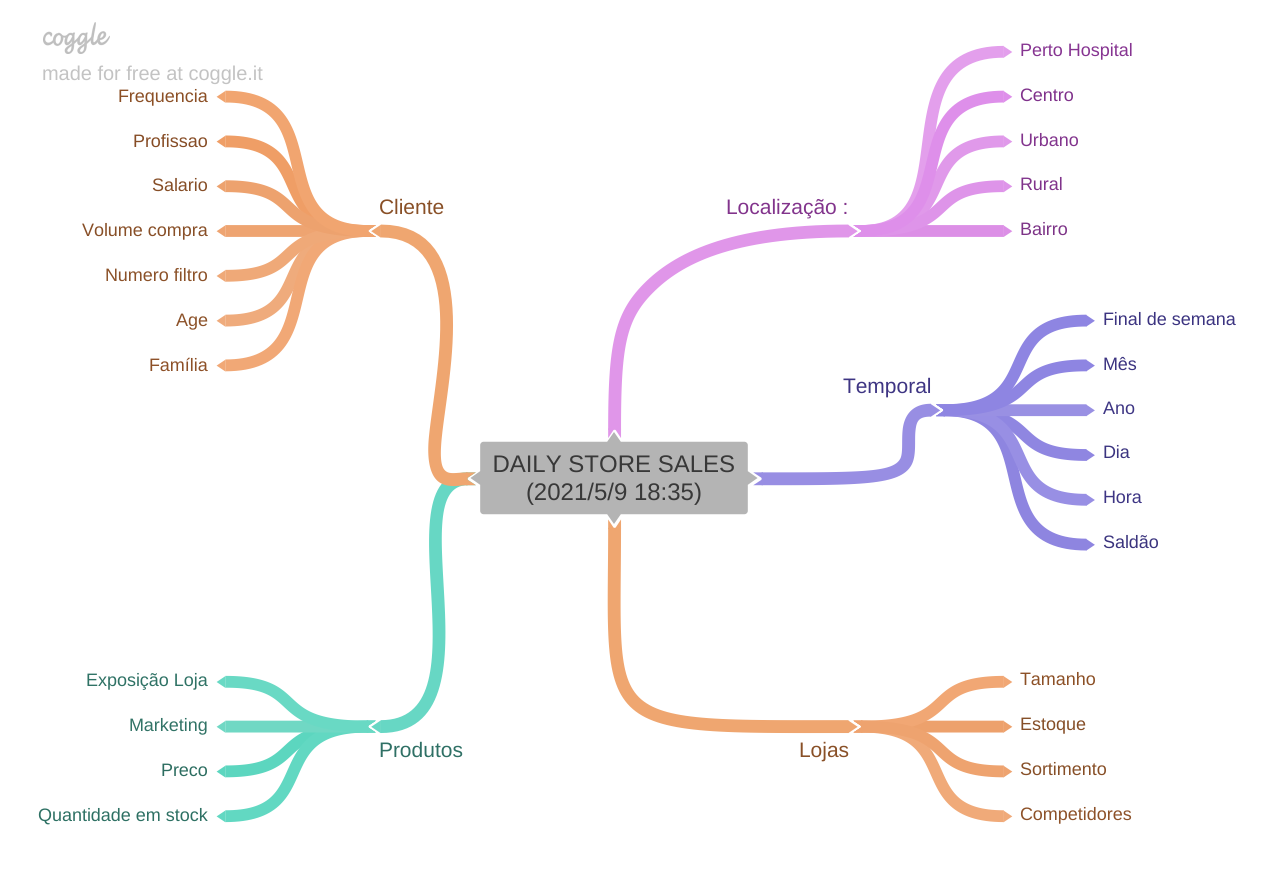

In [53]:
Image ( 'daily_store_map_image.png' )

# 2.2 Criação de hipóteses:

# 2.3 Lista final de hipóteses:

In [54]:
# year:
df2['year'] = df2['date'].dt.year

# month:
df2['month'] = df2['date'].dt.month

# week of year:
#df2['week_of_year'] = df2['date'].dt.weekofyear

# year week:
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since:
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year= x['competition_open_since_year'], month= x['competition_open_since_month'], day= 1 ), axis= 1 )

df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# promo since:
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )

df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )

df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# assortment:
# a = basic, b = extra, c = extendend

df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x =='b' else 'extendend' )

# state holiday:
# a = public holiday, b = Easter holiday, c = Christmas 

df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )


In [55]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 FILTRAGEM DE DADOS:

In [56]:
df3 = df2.copy()

In [57]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,promo_interval,month_map,is_promo,year,month,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,Jul,0,2015,7,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,"Jan,Apr,Jul,Oct",Jul,1,2015,7,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,"Jan,Apr,Jul,Oct",Jul,1,2015,7,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,Jul,0,2015,7,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,Jul,0,2015,7,2015-30,2015-04-01,4,2015-07-27,0


# 3.1 Filtragem de linhas:

In [58]:
df3 = df3[( df3['open'] != 0 ) & ( df3['sales'] > 0 )]

# 3.2 Seleção das colunas:

In [59]:
cols_drop = ['customers', 'open','promo_interval','month_map']
df3 = df3.drop( cols_drop, axis=1 )

In [60]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'year_week', 'competition_since', 'competition_time_month',
       'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 ANALISE EXPLORATORIA DE DADOS:

In [61]:
df4 = df3.copy()

In [62]:
df4

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,promo2_since_week,promo2_since_year,is_promo,year,month,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,31,2015,0,2015,7,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,13,2010,1,2015,7,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,14,2011,1,2015,7,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extendend,620.0,...,31,2015,0,2015,7,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,31,2015,0,2015,7,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,150.0,...,1,2013,0,2013,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,860.0,...,1,2013,0,2013,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,840.0,...,48,2012,1,2013,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,1430.0,...,1,2013,0,2013,1,2013-00,2013-01-01,0,2012-12-31,0


# 4.1 Analise Univariada:

### 4.1.1. Response Variable:

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

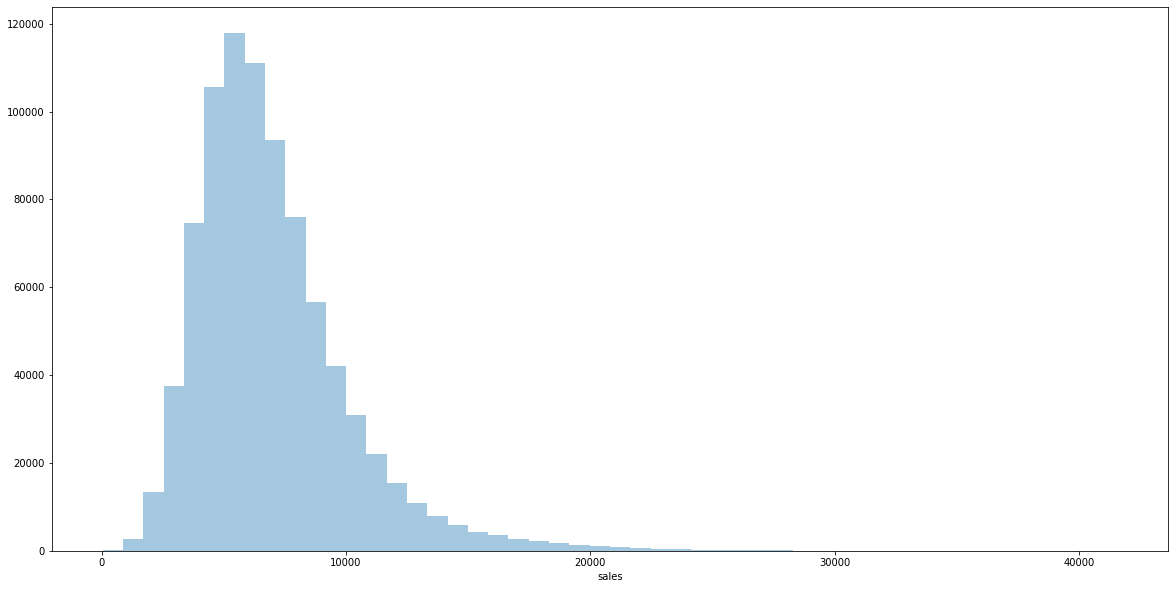

In [63]:
sns.distplot( df4['sales'], kde = False )
plt.rcParams["figure.size"]=(20,10)

### 4.1.2. Numerical Variable:

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

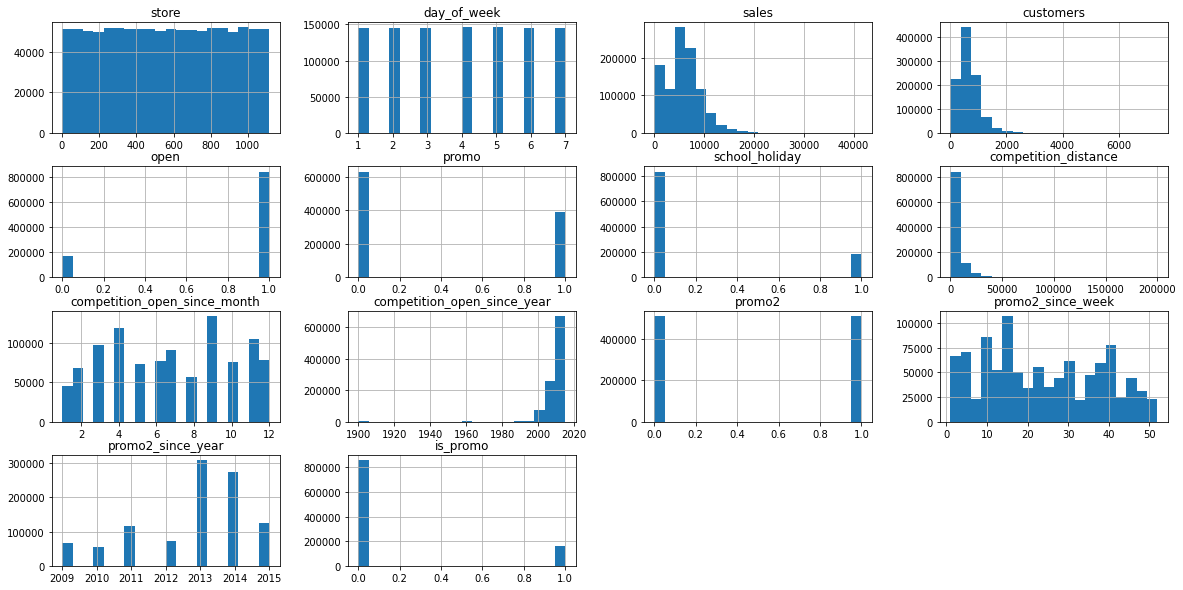

In [64]:
num_attributes.hist(bins=20);
plt.rcParams["figure.size"]=(10,10)


### 4.1.3. Categorical Variable:

In [65]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

ValueError: num must be 1 <= num <= 4, not 6

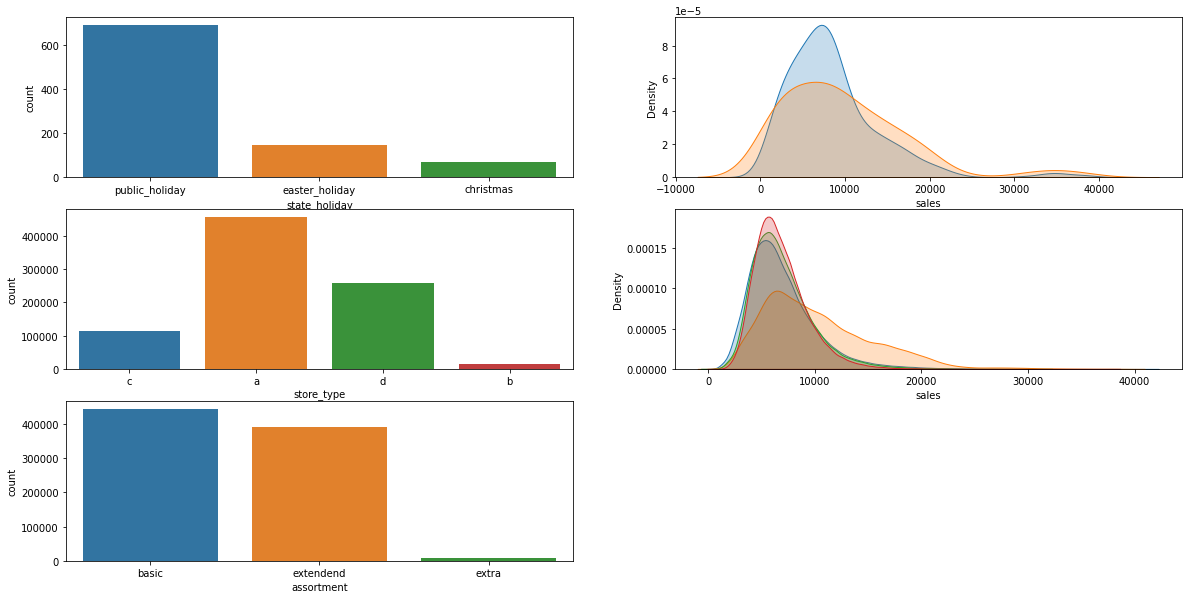

In [69]:
df4['state_holiday'].drop_duplicates()

# state holiday:

plt.subplot( 3, 2, 1 )
a = df4[ df4['state_holiday'] != 'regular_day' ]
sns.countplot( a['state_holiday'] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[ df4['state_holiday'] == 'public_holiday']   ['sales'], label='public_holiday',    shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'easter_holiday']   ['sales'], label='easter_holiday',    shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'chrstimas_holiday']['sales'], label='chrstimas_holiday', shade=True )


# story type:

plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'])

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[ df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'd']['sales'], label='d', shade=True )


# assortment:

plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'])

plt.subplot( 2, 2, 6 )
sns.kdeplot( df4[ df4['assortment'] == 'a']['sales'], label='extended', shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'b']['sales'], label='basic',    shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'c']['sales'], label='extra',    shade=True )
plt.rcParams["figure.size"]=(1,5)



# 4.2 Analise Bivariada:

### H1. Lojas com maior sortimentos deveriam vender mais:
**FALSA** Lojas com MAIOR SORTMENTO vendem MENOS.

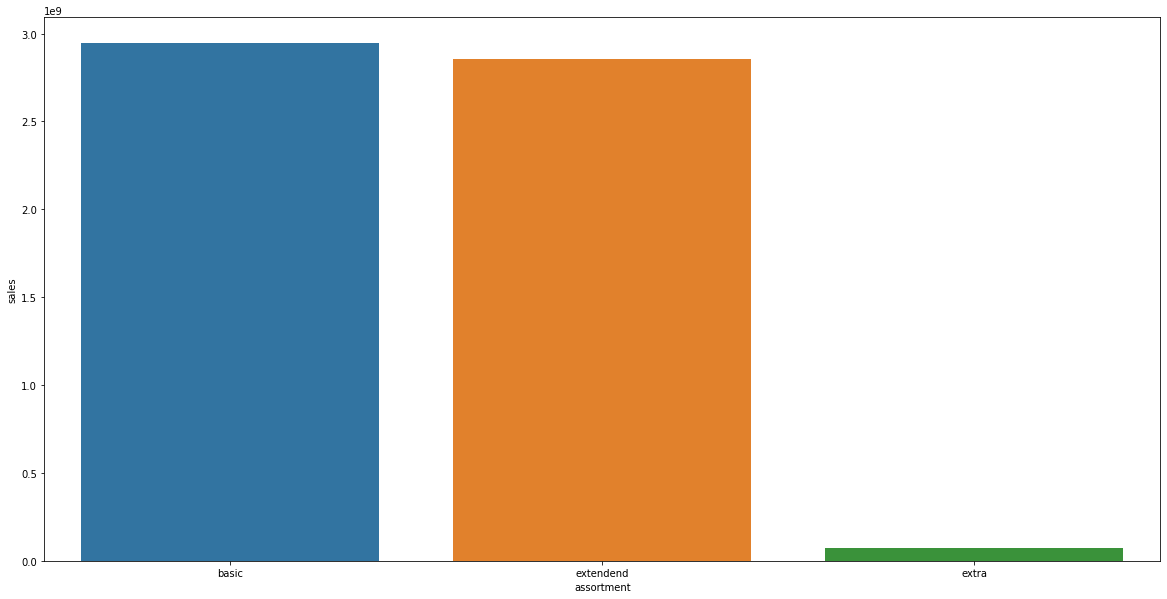

In [71]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x = 'assortment', y='sales', data = aux1 );

<AxesSubplot:xlabel='year_week'>

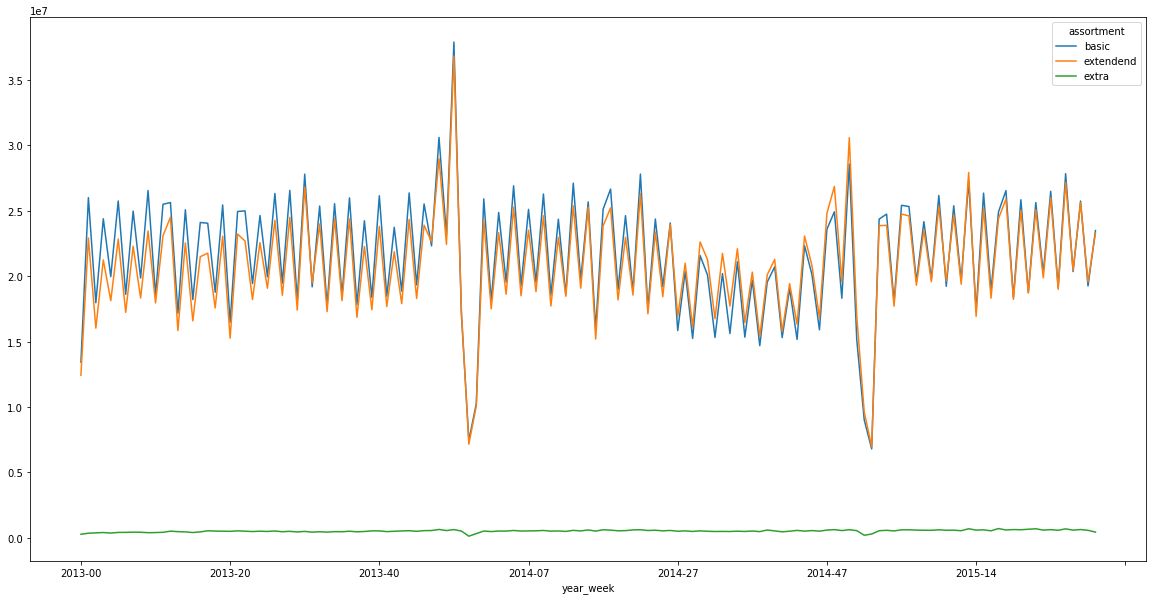

In [73]:
aux2 = df4[['assortment', 'sales', 'year_week']].groupby( [ 'year_week', 'assortment' ] ).sum().reset_index()
aux2.pivot( index = 'year_week', columns ='assortment', values ='sales' ).plot()

<AxesSubplot:xlabel='year_week'>

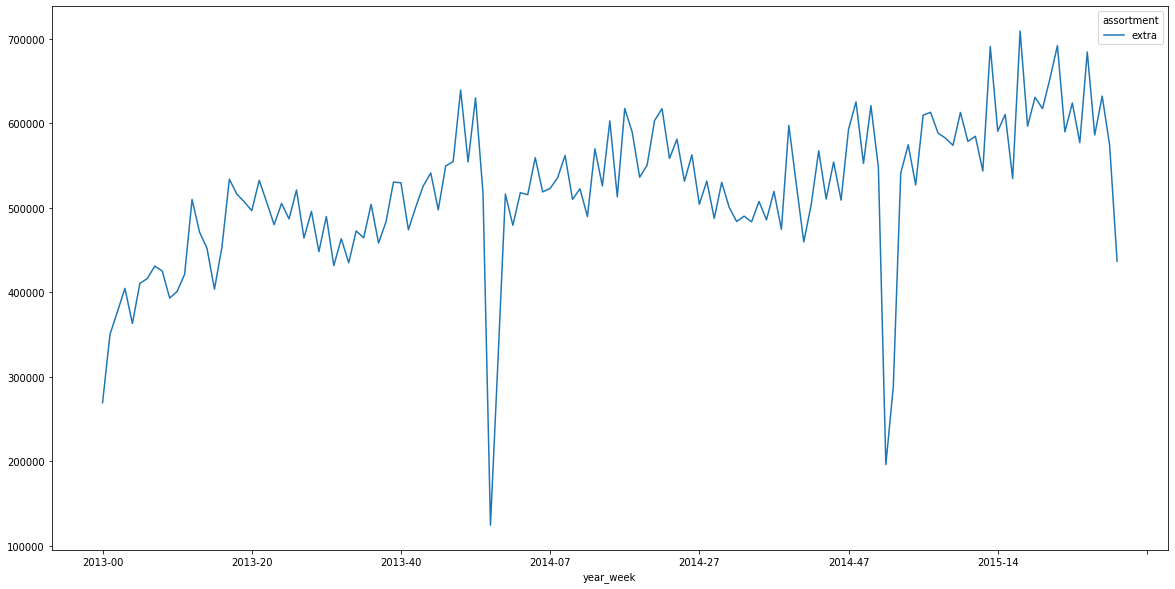

In [74]:
aux3 =  aux2[ aux2['assortment'] == 'extra' ]
aux3.pivot( index = 'year_week', columns ='assortment', values = 'sales' ).plot()

### H2. Lojas com competidores mais próximos deveriam vender menos.

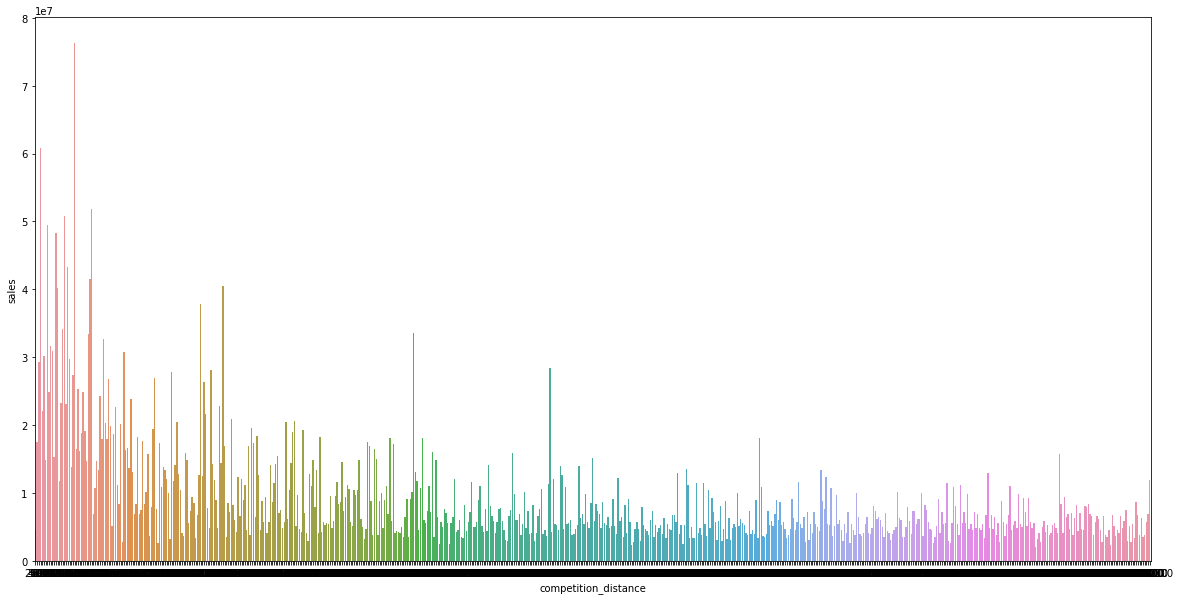

In [76]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.barplot( x = 'competition_distance', y = 'sales', data = aux1 );

### H3. Lojas com competidores á mais tempo deveriam vender  mais.

# 4.3 Analise Multivariada: